🧪 **MODELO DE CLASIFICACIÓN: GÉNERO SEGÚN REMUNERACIÓN Y SECTOR**
# 🎯 Objetivo:
Predecir el género (varón o mujer) a partir de datos como la remuneración, el sector de actividad y el período temporal.



Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Cargar el archivo CSV


In [ ]:
# Cargar datos

url = "https://raw.githubusercontent.com/jorgelinasigal/datascience/master/proyectofinal/tercera%20pre-entrega/Remuneraciones.csv"

df = pd.read_csv(url, header=None)


In [ ]:
df.head()

,0,1,2,3
0,Periodo,Industria,Genero,Valor
1,ene-96,agricultura y ganaderia,Mujeres,380.2
2,feb-96,agricultura y ganaderia,Mujeres,406.8
3,mar-96,agricultura y ganaderia,Mujeres,399.7
4,abr-96,agricultura y ganaderia,Mujeres,375.9


🔹  Transformación de la columna Periodo

 *Pasamos el período de formato string ("ene-96") a una variable numérica FechaNum.*

 ¿Por qué se hace?
 Se convierte el período a una variable numérica continua, útil para que el modelo interprete la evolución temporal (ej. 1996.08, 1997.01). Esto mejora la precisión en lugar de usar un texto como "ene-96".

In [ ]:
print(df.columns)


Index([0, 1, 2, 3], dtype='int64')


In [ ]:
df = pd.read_csv(url)
df.columns = df.columns.str.strip()  # Eliminar espacios en nombres de columnas
print(df.columns)
df.head()

Index(['Periodo', 'Industria', 'Genero', 'Valor'], dtype='object')


,Periodo,Industria,Genero,Valor
0,ene-96,agricultura y ganaderia,Mujeres,380.2
1,feb-96,agricultura y ganaderia,Mujeres,406.8
2,mar-96,agricultura y ganaderia,Mujeres,399.7
3,abr-96,agricultura y ganaderia,Mujeres,375.9
4,may-96,agricultura y ganaderia,Mujeres,395.6


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
meses = {'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}

df[['Mes', 'Año']] = df['Periodo'].str.split('-', expand=True)
df['Mes'] = df['Mes'].map(meses)
df['Año'] = df['Año'].astype(int) + 1900
df['FechaNum'] = df['Año'] + df['Mes'] / 12


**🔹 Codificación de variables categóricas**

*Codificamos Genero como 0 (mujer) y 1 (varón), y convertimos Industria a variables dummy.*

¿Por qué se hace?

Genero se convierte a números (0 y 1) porque los modelos de machine learning no trabajan con texto directamente.

Industria se convierte a variables binarias (dummies), una por cada sector (ej.: Comercio=1, si pertenece a comercio). Esto permite que el modelo "lea" el sector económico.

In [ ]:
le = LabelEncoder()
df['Genero'] = le.fit_transform(df['Genero'])  # Mujeres = 0, Varones = 1

df = pd.get_dummies(df, columns=['Industria'], drop_first=True)

**🔹Separación en variables predictoras (X) y objetivo (y)**

*Separamos **texto en negrita** las variables predictoras X y la variable objetivo y.*

¿Por qué se hace?

-X contiene lo que usaremos para predecir (remuneración, año, industria).

-y es lo que queremos que el modelo aprenda a predecir: el género.


In [ ]:
X = df.drop(columns=['Periodo', 'Genero', 'Mes', 'Año'])  # eliminamos columnas no necesarias
y = df['Genero']

**🔹 División entre entrenamiento y prueba + escalado**

*Dividimos en entrenamiento y test. Además, escalamos las variables numéricas para que no distorsionen el modelo.*

¿Por qué se hace?

Dividimos los datos: 80% para entrenar, 20% para probar si el modelo generaliza.

Escalamos Valor y FechaNum para que tengan igual peso. Esto es importante porque los modelos como Random Forest no se ven afectados, pero otros sí lo necesitan.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['Valor', 'FechaNum']] = scaler.fit_transform(X_train[['Valor', 'FechaNum']])
X_test[['Valor', 'FechaNum']] = scaler.transform(X_test[['Valor', 'FechaNum']])


🔹**Entrenamiento y evaluación del modelo**

*Entrenamos un modelo de clasificación con Random Forest y evaluamos su desempeño.*

¿Por qué se hace?

Entrenamos un Random Forest, un modelo potente para clasificación con muchas variables.

Evaluamos cuán bien predice el género con métricas como:

-Precisión

-Recall

-Accuracy

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.69      0.70      3631
           1       0.70      0.71      0.71      3711

    accuracy                           0.70      7342
   macro avg       0.70      0.70      0.70      7342
weighted avg       0.70      0.70      0.70      7342

Accuracy: 0.7017161536366113


**MATRIZ DE CONFUSIÓN**

¿Por qué se hace?

Nos permite ver cuántos casos fueron clasificados correctamente como mujeres o varones, y cuántos se confundieron.

Ideal para detectar si el modelo está sesgado hacia un género.


-La matriz de confusión resume el rendimiento del modelo de clasificación binaria (clasificación por género). La información se organiza de la siguiente manera:

                       Predicho 0 | Predicho 1 |
      | **Real 0**    | 2503       | 1128       |

      | **Real 1**    | 1062       | 2649       |


**Interpretación:**

2503 (Verdaderos Negativos - TN): El modelo predijo 0 y el valor real era 0.

2649 (Verdaderos Positivos - TP): El modelo predijo 1 y el valor real era 1.

1128 (Falsos Positivos - FP): El modelo predijo 1 pero el valor real era 0.

1062 (Falsos Negativos - FN): El modelo predijo 0 pero el valor real era 1.

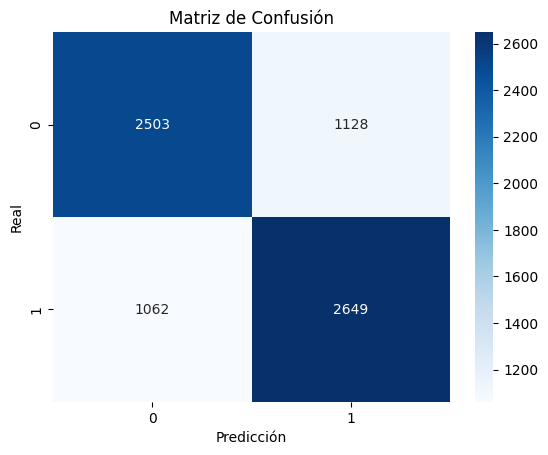

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()



---


**CONCLUSIONES**




**¿Qué está haciendo el modelo?**

-El modelo intenta aprender patrones en los salarios según sector y período para adivinar si la persona es hombre o mujer.

El hecho de que logre una precisión del 70% sugiere que hay una brecha salarial y/o patrones diferenciados entre géneros que el modelo está captando, pero no de forma determinista (no puede distinguir con certeza absoluta).


-El modelo tiene una precisión general del 70% aproximadamente. El desempeño es bastante equilibrado entre ambas clases, aunque hay una cantidad no menor de errores (más de 1000 falsos positivos y más de 1000 falsos negativos). Se podría explorar mejoras ajustando el umbral de decisión o probando otro modelo.


---

**Consideraciones éticas:**


⚠️ Importante: predecir el género a partir de variables como salario puede reforzar estereotipos o sesgos estructurales. Esta tarea es útil si se esta haciendo un análisis crítico o exploratorio, pero no debería usarse para tomar decisiones reales sobre personas.



---



---



REGRESIÓN LOGÍSTICA

In [53]:
# Transformar 'Periodo' a variables numéricas
meses = {'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}
df[['Mes', 'Año']] = df['Periodo'].str.split('-', expand=True)
df['Mes'] = df['Mes'].map(meses)
df['Año'] = df['Año'].astype(int) + 1900
df['FechaNum'] = df['Año'] + df['Mes'] / 12

In [56]:
# Codificar variables
le = LabelEncoder()
df['Genero'] = le.fit_transform(df['Genero'])  # mujer = 0, varón = 1

In [57]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['Periodo', 'Genero', 'Mes', 'Año'])
y = df['Genero']

In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:
# Escalar variables numéricas
scaler = StandardScaler()
X_train[['Valor', 'FechaNum']] = scaler.fit_transform(X_train[['Valor', 'FechaNum']])
X_test[['Valor', 'FechaNum']] = scaler.transform(X_test[['Valor', 'FechaNum']])

** 🔹Entrenar modelo de regresión logística**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [60]:
# Crear y entrenar el modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# Predecir sobre los datos de prueba
y_pred = log_model.predict(X_test)

**🔹 Evaluar desempeño**

In [62]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.68      0.57      3631
           1       0.50      0.31      0.38      3711

    accuracy                           0.49      7342
   macro avg       0.49      0.49      0.48      7342
weighted avg       0.49      0.49      0.48      7342

Accuracy: 0.49291746118223917


<Axes: title={'center': 'Importancia de las variables'}>

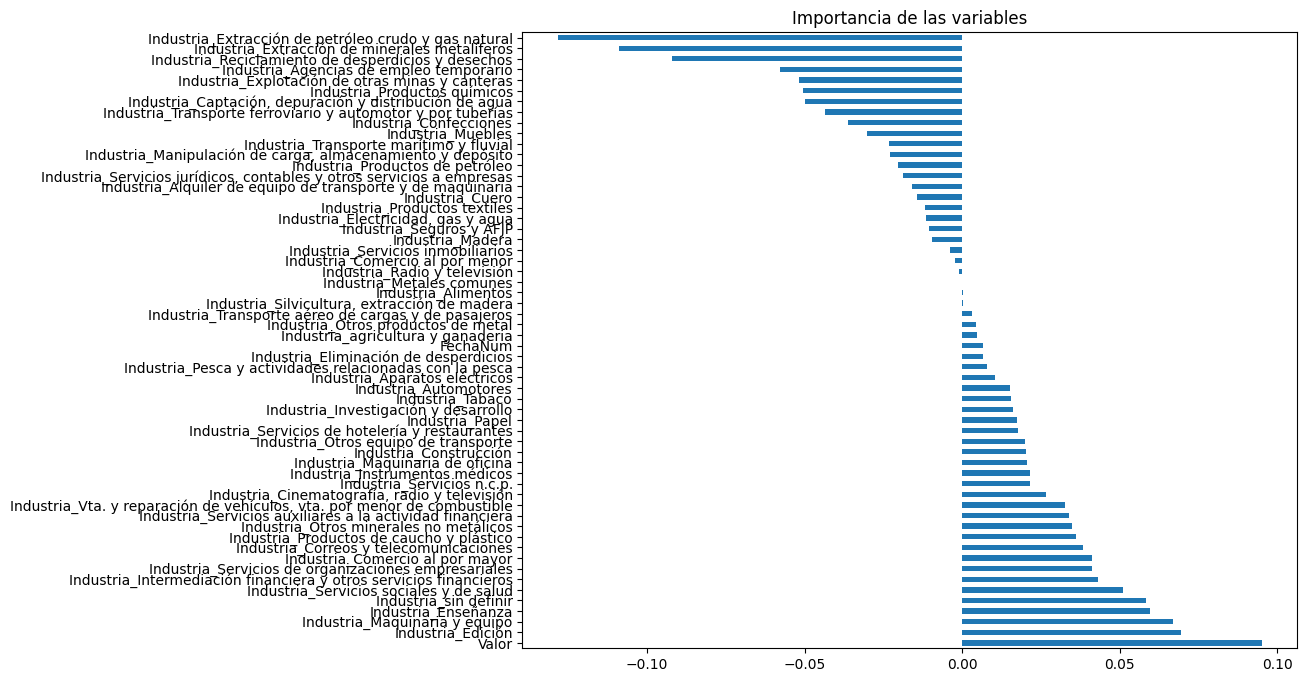

In [63]:
import numpy as np

coef = pd.Series(log_model.coef_[0], index=X.columns)
coef.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), title="Importancia de las variables")


🧠 ¿Qué significan estas métricas?
Accuracy (exactitud global): 0.49


El modelo acierta solo en el 49% de los casos.

Como el dataset está balanceado (~50% mujeres, ~50% varones), es casi como adivinar al azar.

Recall bajo para clase 1 (varones): 0.31

El modelo no logra detectar bien a los varones: solo identifica correctamente el 31% de ellos.

Precision de ambas clases ≈ 0.5

Cuando predice "varón" o "mujer", tiene una chance de acierto cercana al 50%.

F1-score bajo en general (máximo de 0.57)

No hay buen equilibrio entre precisión y recall en ninguna clase.

🔎 ¿Qué indica esto?

El modelo no encuentra un patrón claro entre las variables (Valor, FechaNum, Industria_x) y el género.


Podría deberse a:

-Poca información predictiva: el salario o el sector no explican bien el género.

-Modelo muy simple: la regresión logística es lineal y puede no capturar relaciones complejas.

-Alta superposición entre clases: por ejemplo, mujeres y varones pueden tener sueldos similares en varios sectores.

-Distribución desequilibrada dentro de cada sector (mujeres y varones repartidos por igual en casi todos los rubros).

🧪 ¿Cómo mejorar?

-Opción 1: Probar modelos más complejos

Árboles de decisión, Random Forest o XGBoost suelen capturar relaciones no lineales mejor.

-Opción 2: Análisis exploratorio adicional

Analizar cómo se distribuye el salario (Valor) según género en cada sector.

Ver si hay sectores muy feminizados o masculinizados.

Ver si hay sectores muy feminizados o masculinizados.


-Opción 3: Ingeniería de variables

Crear nuevas variables como:

rango_salarial (cuantiles)

año_categoría (antes/después de cierto año)

Agrupar sectores similares (manufacturas, servicios, etc.)